# Introduction
From the Black-Scholes model, the price of a call is given by,
$$C = \Phi(d_1) S - \Phi(d_2) K e^{-r t},$$
and the price of a put by,
$$P = \Phi(-d_2)e_{-rt} - \Phi(-d_1)S,$$
where
$$d_1 = \frac{1}{\sigma \sqrt{t}} \left[ \ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma.^2}{2}\right) t\right],$$
and
$$d_2 = d_1 - \sigma \sqrt{t}.$$

Since we have already written code to implement these formulas, we will use that to build the payout functions for calls, puts, and spreads.

In [2]:
#  Our usual imports
import numpy as np

import scipy
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#  Black-Scholes formulas for call and put prices
def call_price(d1, d2, S, K, r, t):
    C = np.multiply(S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * K, np.exp(-r * t))
    return C

def put_price(d1, d2, S, K, r, t):
    P = -np.multiply(S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * K, np.exp(-r * t))
    return P

#  Utility function to calculate the d1 and d2 vcalues that are needed above
def d(S, K, r, sigma, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    return d1, d2

## Long Call Option

C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


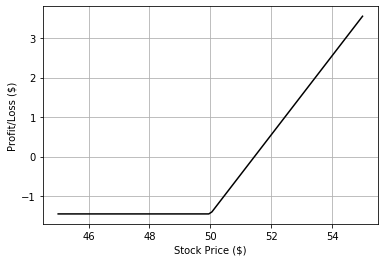

In [11]:
#  We will assume the 50 strike call

#  These are needed for the Black-Schole model, but these values are unimportant as we are setting time to zero
r = 0.01
sigma = 0.2

#  Days to expiration.  We are interested in the call's value at expiration.
t = 0

#  Strike Price
K = 50

#  We are assuming we paid a debit of this much for the call
C0 = 1.45

#  Generate a range of stock prices for plotting.  There will be issues with this is S is exactly equal to K.
S = np.linspace(45, 55, 100)

#  Calculate the call price as a function of S
d1, d2 = d(S, K, r, sigma, t)
C = call_price(d1, d2, S, K, r, t)

#  Plot the payout graph
plt.plot(S, C - C0, 'k')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.grid(True)

##  Long Call Spread

C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'Profit/Loss ($)')

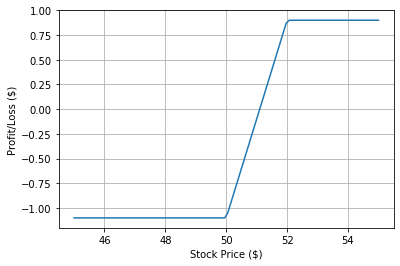

In [13]:
#  Parameters needed for the model
r = 0.01
sigma = 0.2

#  Zero DTE
t = 0

#  We are assuming we are Long the 50/52 call spread.
#  In other words, we are long the 50 and short the 52 call.
#  These are the strikes
K1 = 50
K2 = 52

#  We are assuming this is the cost of the spread when we placed the position.
C0 = 1.10

#  Generate a range of stock prices
S = np.linspace(45, 55, 100)

#  Calculate the price of the 50-strike option
d1, d2 = d(S, K1, r, sigma, t)
C1 = call_price(d1, d2, S, K1, r, t)

#  Calculate the price of the 52-strike option.
d1, d2 = d(S, K2, r, sigma, t)
C2 = call_price(d1, d2, S, K2, r, t)

# Plot Payout
plt.plot(S, (C1 - C2) - C0)
plt.grid(True)
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')

##  Undefined Values
This code as wirrten will have issues if the stock price is exactly equal to the stock price.  See below.

[45 46 47 48 49 50 51 52 53 54 55]
[ 0.  0.  0.  0.  0. nan  1.  2.  3.  4.  5.]
[False False False False False  True False False False False False]
(array([5], dtype=int64),)
[nan]


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


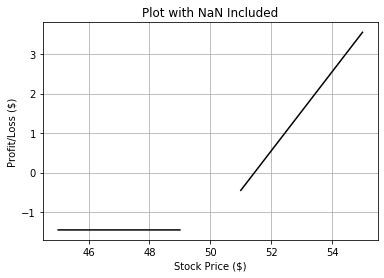

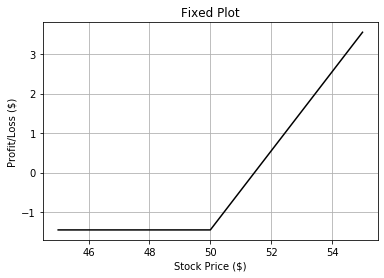

In [25]:
#  Set strike to 50 and generate a small amount of stock prices making sure 50 is included.
K = 50
S = np.arange(45, 56)

#  Print the stock prices to be sure 50 is present.
print(S)

#  Price of the call when we purchased it.
C0 = 1.45

#  Generate call prices
d1, d2 = d(S, K, r, sigma, t)
C = call_price(d1, d2, S, K, r, t)

#  Print call prices.  We see there is a nan at a stock price of $50
print(C)

#  We can detect this with pn.isnan
print(np.isnan(C))

#  We have to address this to generate the plots
plt.plot(S, C - C0, 'k')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title('Plot with NaN Included')
plt.grid(True)

#  Let's fix it
problem_children = np.isnan(C)
index = np.where( problem_children == True )
print(index)
print(C[index])

C[index] = 0
#  Replot it
plt.figure()
plt.plot(S, C - C0, 'k')
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit/Loss ($)')
plt.title('Fixed Plot')
plt.grid(True)